In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=9
paper='2004.04168'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me analyze this Hamiltonian step by step to understand the structure and interactions in this system.

First, let me identify what variables and parameters are used:

1. $s$ and $s'$ appear to be flavor indices, possibly representing spin or some other quantum number.
2. $k$, $k_1$, and $k_2$ are momentum vectors.
3. $U(0)$ and $U(k_1-k_2)$ represent interaction strengths.
4. $t_s(n)$ are hopping parameters that depend on both flavor $s$ and distance $n$.

The Hamiltonian consists of three parts:
1. Kinetic part ($H_{Kinetic}$)
2. Hartree part ($H_{Hartree}$)
3. Fock part ($H_{Fock}$)

Let me address the questions:

### QUESTION 1: Dimension and Basis Order

From the equation, we see operators $c_s^\dagger(k)$ and $c_s(k)$ where $s$ is a flavor index. Since the equation only mentions $s$ and $s'$ without specifying what values they take, we need to infer this.

In condensed matter physics, $s$ often represents spin, which can be 

In [7]:
print(generated_code['thinking'])

Let me analyze this Hamiltonian step by step to understand the structure and interactions in this system.

First, let me identify what variables and parameters are used:

1. $s$ and $s'$ appear to be flavor indices, possibly representing spin or some other quantum number.
2. $k$, $k_1$, and $k_2$ are momentum vectors.
3. $U(0)$ and $U(k_1-k_2)$ represent interaction strengths.
4. $t_s(n)$ are hopping parameters that depend on both flavor $s$ and distance $n$.

The Hamiltonian consists of three parts:
1. Kinetic part ($H_{Kinetic}$)
2. Hartree part ($H_{Hartree}$)
3. Fock part ($H_{Fock}$)

Let me address the questions:

### QUESTION 1: Dimension and Basis Order

From the equation, we see operators $c_s^\dagger(k)$ and $c_s(k)$ where $s$ is a flavor index. Since the equation only mentions $s$ and $s'$ without specifying what values they take, we need to infer this.

In condensed matter physics, $s$ often represents spin, which can be up ($\uparrow$) or down ($\downarrow$). Given that th

In [8]:
print(generated_code['text'])

# Analysis of the Hartree-Fock Hamiltonian

1) Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: spin_up, spin_down

2) EXP-VAL DEPENDENT TERMS: 
```
"⟨c_s^†(k1)c_s(k1)⟩": "exp_val[s, s, k1_idx]",
"⟨c_s^†(k1)c_s'(k1)⟩": "exp_val[s, s', k1_idx]"
```

TERMS:
- E_s(k)c_s^†(k)c_s(k) (s=up) → H[0, 0, k], NI
- E_s(k)c_s^†(k)c_s(k) (s=down) → H[1, 1, k], NI
- U(0)⟨c_up^†(k1)c_up(k1)⟩c_down^†(k2)c_down(k2) → H[1, 1, k], I
- U(0)⟨c_down^†(k1)c_down(k1)⟩c_up^†(k2)c_up(k2) → H[0, 0, k], I
- -U(k1-k2)⟨c_up^†(k1)c_up(k1)⟩c_up^†(k2)c_up(k2) → H[0, 0, k], I
- -U(k1-k2)⟨c_down^†(k1)c_down(k1)⟩c_down^†(k2)c_down(k2) → H[1, 1, k], I
- -U(k1-k2)⟨c_up^†(k1)c_down(k1)⟩c_down^†(k2)c_up(k2) → H[0, 1, k], I
- -U(k1-k2)⟨c_down^†(k1)c_up(k1)⟩c_up^†(k2)c_down(k2) → H[1, 0, k], I

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for a spin-1/2 system on a triangular lattice with
  hopping and interaction terms.
  


In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for a spin-1/2 system on a triangular lattice with
  hopping and interaction terms.
  
  Args:
    N_shell (int): Number of shells in the first Brillouin zone.
    parameters (dict): Dictionary containing model parameters.
    filling_factor (float): Filling factor of the system. Defaults to 0.5.
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={'t1': 6.0, 't2': 1.0, 'U0': 1.0, 'U1': 0.5, 'T': 0.0, 'a': 1.0}, filling_factor: float=0.5):
    self.lattice = 'triangular'
    self.D = (2,)  # Two spin flavors
    self.basis_order = {'0': 'spin'}
    # 0: spin up
    # 1: spin down

    # Occupancy relevant parameters
    self.nu = filling_factor
    self.T = parameters.get('T', 0.0)  # temperature, default to 0
    self.a = parameters.get('a', 1.0)  # Lattice constant
    self.primitive_vectors = get_primitive_vectors_triangle(self.a)
    self.k_spac

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_9.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

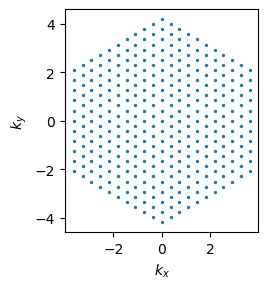

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

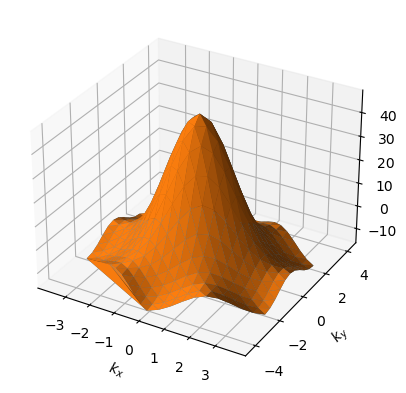

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

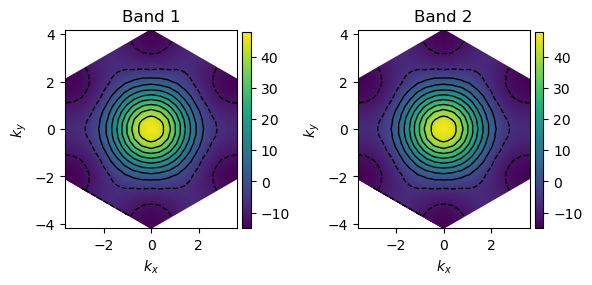

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e-5},filling_factor=0.5)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [25]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


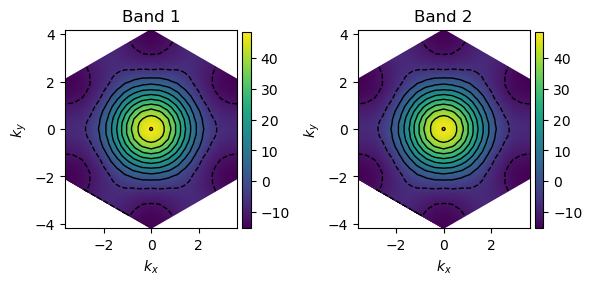

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e5},filling_factor=0.5)

In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 2


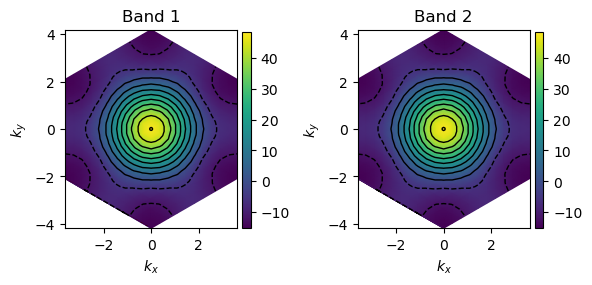

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is -63.76
U/T is 0.08
mean_U is 0.49


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to evaluate whether the image provided shows a correct momentum space mesh in the first Brillouin zone of a triangular lattice system based on the Hamiltonian and the rubric.

Let me break down the problem:

1. We're working with a triangular lattice.
2. The Hamiltonian is given in second-quantized form with kinetic, Hartree, and Fock terms.
3. The hopping parameters are t_1 = 6 meV (nearest-neighbor) and t_2 = 1 meV (next-nearest-neighbor).
4. We need to check if the image shows the correct first Brillouin zone and if it respects the appropriate point group symmetry.

First, let's recall what the first Brillouin zone of a triangular lattice looks like:
- A triangular lattice in real space has a hexagonal first Brillouin zone in momentum (k) space.
- The Brillouin zone should show six-fold rotational symmetry.

Now, looking at the image:
1. The image shows a hexagonal array of points in k-space, which is the correct shape for 

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and evaluate it based on the provided rubric to determine if it correctly represents the band structure of a triangular lattice with the given Hamiltonian.

Going through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the plots, I can see that both Band 1 and Band 2 are displayed within a hexagonal boundary. This is correct for a triangular lattice, as the first Brillouin zone of a triangular lattice is indeed a hexagon. So this aspect appears to be correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In both Band 1 and Band 2, the highest energy regions (yellow) are at the center of the Brillouin zone, around (kx, ky) = (0, 0).

2.2 Trace the pattern of energy variation across the zone:
The energy 

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu=1/2)
    )


#################### THINKING ####################

Let me analyze this image based on the provided rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone boundary has a hexagonal shape, which is indeed what's expected for a triangular lattice in reciprocal space. The hexagonal boundary is clearly visible in both Band 1 and Band 2 plots.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (shown in yellow) appear at the center of both band plots, around k_x = 0, k_y = 0.

2.2 Trace the pattern of energy variation across the zone:
The energy appears to decrease radially outward from the center in concentric patterns (shown by the contour lines), going from yellow (highest) at the center to purple (lowest) at the edges of the Brillouin zone

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int=1e5)
    )


#################### THINKING ####################

I need to analyze the image showing false color plots for two bands (Band 1 and Band 2) in the Brillouin zone for a triangular lattice after Hartree-Fock calculations. I'll go through the rubric step by step.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, the Brillouin zone boundary appears to be a hexagon. This is correct for a triangular lattice - the first Brillouin zone of a triangular lattice is indeed hexagonal. So this matches expectations.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
The highest energy regions (yellow) appear to be at the center of both Band 1 and Band 2, around the point (kx=0, ky=0).

2.2 Trace the pattern of energy variation across the zone
For both bands, the energy decreases radially outward from the center in a

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '9' saved to final_answer.yaml
